# Tasks:
1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the data.

**Task 1**

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

In [5]:
# exploring the data:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [8]:
def convertTime( time:str ):
    try:
        date = time.split()[0]
        timeI = time.split()[1]
        m = date[:2]
        d = date[3:5]
        y = int( date[6:] ) 
        if( y < 100 ):
            y += 2000
        y = str( y )
        h = int(timeI.split(':')[0])
        mi = timeI.split(':')[1]
        if time[-2:] == 'PM' : 
            if h != 12:
                h += 12
        elif time[-2:] == 'AM':
            if h == 12:
                h -= 12
        h = str( h )
        processedTime = m + '/' + d + '/' + y + ' ' + h + ':' + mi
        return datetime.strptime( processedTime, '%m/%d/%Y %H:%M' )
    except:
        pass

dataset['Created Date'] = dataset['Created Date'].apply(convertTime)
dataset['Closed Date'] = dataset['Closed Date'].apply(convertTime)

dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

In [9]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00


**Task 2**

(array([2.80664e+05, 1.40930e+04, 2.32700e+03, 7.71000e+02, 3.32000e+02,
        1.29000e+02, 9.10000e+01, 3.40000e+01, 2.20000e+01, 1.10000e+01,
        3.20000e+01, 4.00000e+00, 1.00000e+01, 4.00000e+00, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([    0.  ,   711.46,  1422.92,  2134.38,  2845.84,  3557.3 ,
         4268.76,  4980.22,  5691.68,  6403.14,  7114.6 ,  7826.06,
         8537.52,  9248.98,  9960.44, 10671.9 , 11383.36, 12094.82,
        12806.28, 13517.74, 14229.2 , 14940.66, 15652.12, 16363.

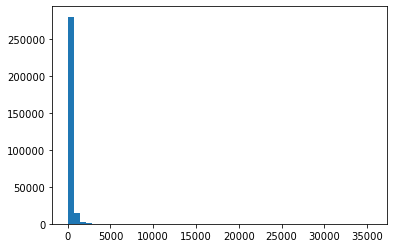

In [26]:
x = dataset['Request_Closing_Time'].values / np.timedelta64( 1, 'm')
plt.hist( x, bins = 50, range = (0, max(x) ) )

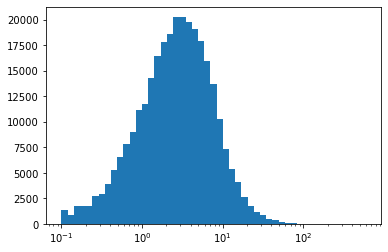

In [19]:
x = dataset['Request_Closing_Time'].values / np.timedelta64( 1, 'h')

logbins = np.logspace(np.log10(0.1),np.log10(max(x)), 50 )
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.xlabel('')

In [27]:
dataset['Request_Closing_Time'].describe()

count                       298534
mean     0 days 04:18:51.817615413
std      0 days 06:05:22.155510708
min                0 days 00:01:00
25%                0 days 01:17:00
50%                0 days 02:43:00
75%                0 days 05:21:00
max               24 days 16:53:00
Name: Request_Closing_Time, dtype: object

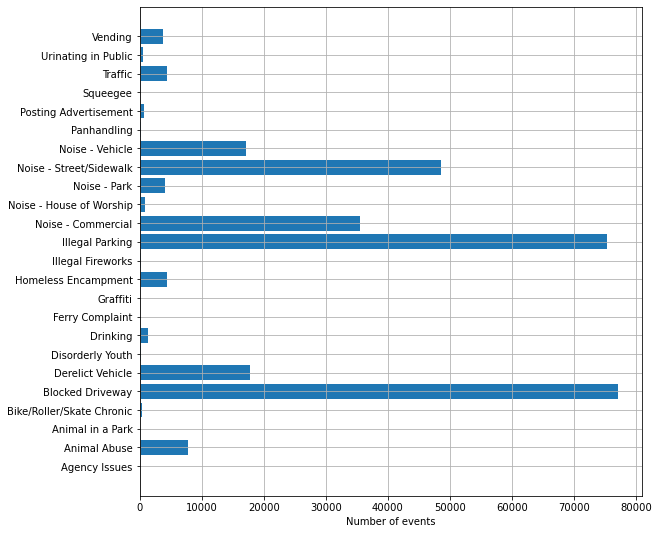

In [23]:
a = dataset.groupby('Complaint Type').describe()
typesOfAction = list( dataset.groupby('Complaint Type').groups.keys() )
numberOfIncidents = [ i for i in a[(                  'Unique Key', 'count')]]
plt.figure( figsize = ( 9, 9 ) )
plt.barh( typesOfAction, numberOfIncidents )
plt.xlabel('Number of events')
plt.grid()
plt.show()

In [ ]:
dataset.sort_values()